In [17]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score,plot_confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
model_data = pd.read_csv('deploy_data.csv')

In [19]:
model_data.head(5)

,Unnamed: 0,LoanStatus,Term,CreditGrade,BorrowerAPR,BorrowerRate,BorrowerState,CurrentDelinquencies,DebtToIncomeRatio,EstimatedEffectiveYield,...,OpenRevolvingMonthlyPayment,TotalInquiries,RevolvingCreditBalance,LoanOriginationDate,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,InvestmentFromFriendsCount,Investors
0,0,0,36,3,0.16516,0.1580,5,5.875166,0.17,0.168661,...,24,3.0,0.000000,1711,9425.00,1971.1400,0.00,0.0,0,258
1,2,0,36,6,0.28269,0.2750,10,5.875166,0.06,0.168661,...,0,1.0,17598.706751,34,3001.00,1185.6300,0.00,0.0,0,41
2,11,0,36,3,0.15033,0.1325,4,5.875166,0.27,0.168661,...,40,5.0,1220.000000,197,1000.00,11.6500,0.00,0.0,0,53
3,12,0,36,3,0.17969,0.1435,1,5.875166,0.18,0.126400,...,290,4.0,8624.000000,138,88.64,47.1774,0.00,0.0,0,1
4,15,0,36,3,0.35797,0.3177,9,5.875166,0.49,0.289600,...,300,1.0,9103.000000,961,209.75,311.3800,3790.25,0.0,0,10


In [20]:
model_data.duplicated().sum()

0

In [21]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57324 entries, 0 to 57323
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       57324 non-null  int64  
 1   LoanStatus                       57324 non-null  int64  
 2   Term                             57324 non-null  int64  
 3   CreditGrade                      57324 non-null  int64  
 4   BorrowerAPR                      57324 non-null  float64
 5   BorrowerRate                     57324 non-null  float64
 6   BorrowerState                    57324 non-null  int64  
 7   CurrentDelinquencies             57324 non-null  float64
 8   DebtToIncomeRatio                57324 non-null  float64
 9   EstimatedEffectiveYield          57324 non-null  float64
 10  EstimatedLoss                    57324 non-null  float64
 11  EstimatedReturn                  57324 non-null  float64
 12  ProsperRating (num

In [22]:
# model_data.drop(['InvestmentFromFriendsCount','Investors'],axis=1,inplace=True)
model_data.drop(['Unnamed: 0'],axis=1,inplace=True)


In [23]:
model_data.head(3)

,LoanStatus,Term,CreditGrade,BorrowerAPR,BorrowerRate,BorrowerState,CurrentDelinquencies,DebtToIncomeRatio,EstimatedEffectiveYield,EstimatedLoss,...,OpenRevolvingMonthlyPayment,TotalInquiries,RevolvingCreditBalance,LoanOriginationDate,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,InvestmentFromFriendsCount,Investors
0,0,36,3,0.16516,0.1580,5,5.875166,0.17,0.168661,0.080306,...,24,3.0,0.000000,1711,9425.0,1971.14,0.0,0.0,0,258
1,0,36,6,0.28269,0.2750,10,5.875166,0.06,0.168661,0.080306,...,0,1.0,17598.706751,34,3001.0,1185.63,0.0,0.0,0,41
2,0,36,3,0.15033,0.1325,4,5.875166,0.27,0.168661,0.080306,...,40,5.0,1220.000000,197,1000.0,11.65,0.0,0.0,0,53


In [24]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57324 entries, 0 to 57323
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LoanStatus                       57324 non-null  int64  
 1   Term                             57324 non-null  int64  
 2   CreditGrade                      57324 non-null  int64  
 3   BorrowerAPR                      57324 non-null  float64
 4   BorrowerRate                     57324 non-null  float64
 5   BorrowerState                    57324 non-null  int64  
 6   CurrentDelinquencies             57324 non-null  float64
 7   DebtToIncomeRatio                57324 non-null  float64
 8   EstimatedEffectiveYield          57324 non-null  float64
 9   EstimatedLoss                    57324 non-null  float64
 10  EstimatedReturn                  57324 non-null  float64
 11  ProsperRating (numeric)          57324 non-null  float64
 12  ProsperRating (Alp

### Feature Scaling 

In [25]:
x = model_data.drop("LoanStatus",axis=1)
y = model_data["LoanStatus"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=45)

In [26]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
normal_scalar = MinMaxScaler()
normal_scalar.fit(x_train)
array = normal_scalar.transform(x_train)
normal_train_df = pd.DataFrame(array,columns=x_train.columns)
normal_train_df

,Term,CreditGrade,BorrowerAPR,BorrowerRate,BorrowerState,CurrentDelinquencies,DebtToIncomeRatio,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,OpenRevolvingMonthlyPayment,TotalInquiries,RevolvingCreditBalance,LoanOriginationDate,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,InvestmentFromFriendsCount,Investors
0,0.5,0.857143,0.752634,0.734043,0.08,0.0,0.010989,0.698428,0.208823,0.619381,...,0.007407,0.037135,0.001516,0.897519,0.010574,0.034825,0.061047,0.0,0.0,0.003367
1,0.5,0.857143,0.338552,0.315106,0.96,0.0,0.005994,0.698428,0.208823,0.619381,...,0.000000,0.002653,0.000000,0.052319,0.028571,0.002252,0.036778,0.0,0.0,0.000842
2,0.5,0.428571,0.725633,0.680638,0.66,0.0,0.021978,0.951745,0.393520,0.736783,...,0.016216,0.018568,0.006848,0.975728,0.071429,0.028051,0.036778,0.0,0.0,0.018519
3,0.5,0.428571,0.728826,0.675957,0.62,0.0,0.024975,0.939581,0.443367,0.683025,...,0.011144,0.013263,0.001473,0.347357,0.006105,0.027067,0.144131,0.0,0.0,0.046296
4,0.5,0.428571,0.728826,0.675957,0.54,0.0,0.021978,0.939581,0.464137,0.666295,...,0.006673,0.018568,0.001248,0.785868,0.071429,0.033338,0.036778,0.0,0.0,0.002525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40121,0.5,0.857143,0.478951,0.489362,0.08,0.0,0.006150,0.698428,0.208823,0.619381,...,0.000000,0.014813,0.012258,0.533981,0.008661,0.017783,0.140724,0.0,0.0,0.006734
40122,0.5,0.428571,0.308150,0.314894,0.20,0.0,0.006993,0.698428,0.208823,0.619381,...,0.005939,0.007958,0.018703,0.176375,0.214286,0.110852,0.036778,0.0,0.0,0.164141
40123,0.5,0.428571,0.730091,0.685106,0.62,0.0,0.011988,0.672582,0.379673,0.752398,...,0.007608,0.021220,0.002417,0.248652,0.040161,0.076789,0.078943,0.0,0.0,0.073232
40124,0.5,0.571429,0.739382,0.720638,0.02,0.0,0.027567,0.698428,0.208823,0.619381,...,0.056857,0.063660,0.019937,0.337109,0.030922,0.073493,0.091402,0.0,0.0,0.029461


In [27]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler


# # Separate features and target variable
# x = model_data.drop('LoanStatus', axis=1)
# y = model_data['LoanStatus']

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit and transform the feature data
# X_scaled = scaler.fit_transform(x)

# # Create a new DataFrame with the scaled features
# scaled_dataset = pd.DataFrame(X_scaled, columns=x.columns)

# # Concatenate the scaled features with the target variable
# scaled_dataset['LoanStatus'] = y

# # Display the scaled dataset
# print(scaled_dataset.head())


In [28]:
# scaled_dataset.head()

In [29]:
# x_train.head()

* Logistic Regression
* K-Nearest Neighbours
* Support Vector Machines
* Kernel SVM
* Naïve Bayes
* Decision Tree Classification
* Random Forest Classification

> ### Step 1:
* Define dependent and independent variables and then split the data into a training set and testing set.

In [30]:
#Define the independent and dependent variables

x= model_data.drop(['LoanStatus'], axis=1)
y= model_data['LoanStatus'] #dependent variable is Decision

# splitting the data
# stratify >> it will make equal proportion  of target column
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=45,stratify=y)

### 1. Logistic Regression


In [31]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

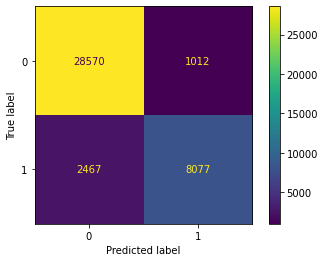

In [33]:
plot_confusion_matrix(logistic_model,x_train,y_train)

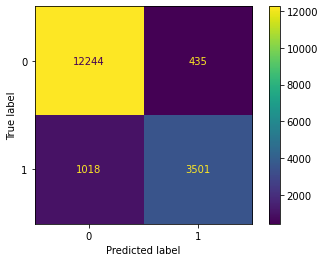

In [34]:
plot_confusion_matrix(logistic_model,x_test,y_test)

In [35]:
logistic_model.score(x_test,y_test)

0.9155134317943947

In [36]:
# Training
y_pred_train = logistic_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confustion matrix\n",cnf_matrix)
print("*"*20)
accuracy = accuracy_score(y_train,y_pred_train)*100
print("Accuracy",accuracy)
print("*"*20)
clf_report = classification_report(y_train,y_pred_train)
print("classification report\n",clf_report)

confustion matrix
 [[28570  1012]
 [ 2467  8077]]
********************
Accuracy 91.3298110950506
********************
classification report
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     29582
           1       0.89      0.77      0.82     10544

    accuracy                           0.91     40126
   macro avg       0.90      0.87      0.88     40126
weighted avg       0.91      0.91      0.91     40126



In [37]:
# Testing
y_pred_test_lr = logistic_model.predict(x_test)
cnf_matrix_lr = confusion_matrix(y_test,y_pred_test_lr)
print("confustion matrix\n",cnf_matrix_lr)
# cm = confusion_matrix(y_test, y_pred)
print("*"*20)
accuracy = accuracy_score(y_test,y_pred_test_lr)*100
print("Accuracy",accuracy)

clf_report = classification_report(y_test,y_pred_test_lr)
print("classification report\n",clf_report)

confustion matrix
 [[12244   435]
 [ 1018  3501]]
********************
Accuracy 91.55134317943947
classification report
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     12679
           1       0.89      0.77      0.83      4519

    accuracy                           0.92     17198
   macro avg       0.91      0.87      0.89     17198
weighted avg       0.91      0.92      0.91     17198



##### Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

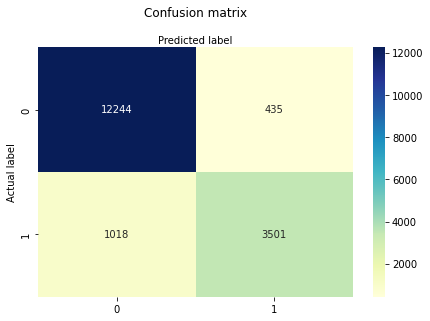

In [38]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

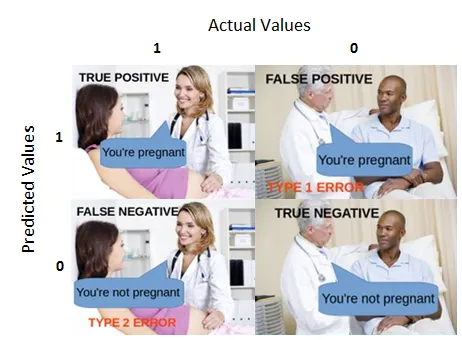

In [39]:
TP = cnf_matrix[1,1]
TN = cnf_matrix[1,1]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]

In [40]:
# # print precision score
# TP = cnf_matrix_lr[3,4]
# precision = TP / float(TP + FP)

# print('Precision : {0:0.4f}'.format(precision))

In [41]:
TN = cnf_matrix[1,1]
TN

8077

In [42]:
# ----------------------------------------------------------------------------------------------------------------------------

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [44]:
from sklearn.model_selection import GridSearchCV
parameter= {'penalty' : ['l1', 'l2', 'elasticnet'],'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50]}

In [45]:
classifier_regressor= GridSearchCV(classifier,param_grid=parameter,scoring="accuracy",cv=5)

In [46]:
classifier_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [47]:
print (classifier_regressor.best_params_)

{'C': 4, 'penalty': 'l2'}


In [48]:
print (classifier_regressor.best_score_)

0.9137218370513898


In [49]:
# Prediction
y_pred_logistic = classifier_regressor.predict(x_test)

In [50]:
print(y_pred_logistic)

[0 1 1 ... 1 0 0]


In [51]:
# Accuracy score
from sklearn.metrics import accuracy_score,classification_report
print(classification_report (y_pred_logistic, y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     13250
           1       0.78      0.89      0.83      3948

    accuracy                           0.92     17198
   macro avg       0.87      0.91      0.89     17198
weighted avg       0.92      0.92      0.92     17198



In [52]:
score= accuracy_score(y_pred_logistic, y_test)*100
print(score)

91.58623095708803


Logistic Regression Model Fitting

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression()

In [54]:
# Predicting the test set results and calculating the accuracy

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [55]:
# Confusion Matrix


from sklearn.metrics import confusion_matrix,roc_auc_score
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[12246   465]
 [ 1060  3427]]


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12711
           1       0.88      0.76      0.82      4487

    accuracy                           0.91     17198
   macro avg       0.90      0.86      0.88     17198
weighted avg       0.91      0.91      0.91     17198



### 2. Naive Bayes Classifier

In [57]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [58]:
# For Testing

y_pred_test_nb = gnb.predict(x_test)

y_pred_test_nb

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
# Checking accuracy score of test model

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_nb)))

Model accuracy score: 0.8589


In [60]:
# For Training
y_pred_train_nb = gnb.predict(x_train)

y_pred_train_nb


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [61]:
# Checking accuracy score of train model

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_nb)))

Model accuracy score: 0.8671


Check for overfitting and underfitting

In [62]:
# print the scores on train and test

print('Training score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Testing score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training score: 0.8671
Testing score: 0.8589


<AxesSubplot:>

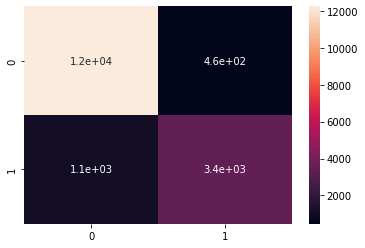

In [63]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
cm
sns.heatmap(cm, annot=True)


In [64]:
# Predicting the Test set results  
y_pred = gnb.predict(x_test)  
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

* Oberservation : The training accuracy score is 0.7898 while the test accuracy to be 0.0.7894. These two values are quite comparable. So, there is no sign of overfitting.

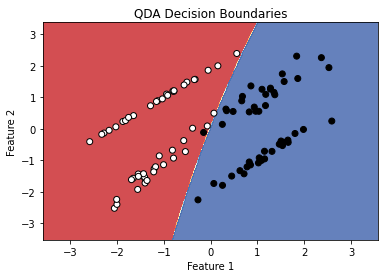

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Generate synthetic data 
X, y = make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42
)

# Fit the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

# Create a mesh grid of points to evaluate the model over the entire feature space
h = 0.02  # Step size of the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Make predictions on the mesh grid
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.binary)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('QDA Decision Boundaries')

plt.show()


## Decision Tree Algorithm

#### Model Training 

In [66]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score


dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

#### Model Evaluation

In [67]:
# Training
y_pred_train = dt_clf.predict(x_train)

clf_matricx = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",clf_matricx)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuarcy\n",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print('clf_report\n',clf_report)

confusion metrics
 [[29550     0]
 [    0 10576]]
accuarcy
 1.0
clf_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29550
           1       1.00      1.00      1.00     10576

    accuracy                           1.00     40126
   macro avg       1.00      1.00      1.00     40126
weighted avg       1.00      1.00      1.00     40126



In [68]:
# Testing
y_pred_test = dt_clf.predict(x_test)

clf_matricx = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",clf_matricx)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuarcy\n",accuracy)

clf_report = classification_report(y_test,y_pred_test)
print('clf_report\n',clf_report)

confusion metrics
 [[12287   424]
 [  431  4056]]
accuarcy
 0.9502849168507966
clf_report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     12711
           1       0.91      0.90      0.90      4487

    accuracy                           0.95     17198
   macro avg       0.94      0.94      0.94     17198
weighted avg       0.95      0.95      0.95     17198



#### Hyperparamter Tuning

In [69]:
# dt_model = DecisionTreeClassifier()
# hyperparameter = {"criterion":["gini","entropy"],
#                  "random_state":[45,41],
#                  "max_depth":np.arange(3,8),
#                  "min_samples_split":np.arange(2,20),
#                  "min_samples_leaf":np.arange(2,15)}      
# gscv_dt_clf = GridSearchCV(dt_model,hyperparameter,cv = 2)
# gscv_dt_clf.fit(x_train,y_train)

In [70]:
# gscv_dt_clf.best_estimator_

In [71]:
# dt_clf = DecisionTreeClassifier(max_depth=7,min_samples_split=7, min_samples_leaf=5, random_state=45)
# dt_clf.fit(x_train,y_train)

# # Training
# y_pred_train = dt_clf.predict(x_train)

# clf_matricx = confusion_matrix(y_train,y_pred_train)
# print("confusion metrics\n",clf_matricx)

# accuracy = accuracy_score(y_train,y_pred_train)
# print("accuarcy\n",accuracy)

# clf_report = classification_report(y_train,y_pred_train)
# print('clf_report\n',clf_report)

In [72]:
# # Testing
# y_pred_test = dt_clf.predict(x_test)

# clf_matricx = confusion_matrix(y_test,y_pred_test)
# print("confusion metrics\n",clf_matricx)

# accuracy = accuracy_score(y_test,y_pred_test)
# print("accuarcy\n",accuracy)

# clf_report = classification_report(y_test,y_pred_test)
# print('clf_report\n',clf_report)

In [73]:
model_data['LoanStatus'].value_counts()

0    42261
1    15063
Name: LoanStatus, dtype: int64

### 4.0 K-Nearest Neighbours



In [74]:
# Model Training
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()    #  default = k=5 ,p=2
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

## Evaluatution

In [75]:
# Testing
y_pred_test_knn = knn_clf.predict(x_test)

cnf_metrics = confusion_matrix(y_test,y_pred_test_knn)
print("confusion metrics\n",cnf_metrics)
print("*"*20)
accuracy = accuracy_score(y_test,y_pred_test_knn)
print("Accuracy\n",accuracy)
print("*"*20)
clf_report = classification_report(y_test,y_pred_test_knn)
print("Classification report\n",clf_report)

confusion metrics
 [[12224   487]
 [  390  4097]]
********************
Accuracy
 0.949005698337016
********************
Classification report
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     12711
           1       0.89      0.91      0.90      4487

    accuracy                           0.95     17198
   macro avg       0.93      0.94      0.93     17198
weighted avg       0.95      0.95      0.95     17198



In [76]:
# Training
y_pred_train_knn = knn_clf.predict(x_train)

cnf_metrics = confusion_matrix(y_train,y_pred_train_knn)
print("confusion metrics\n",cnf_metrics)
print("*"*20)
accuracy = accuracy_score(y_train,y_pred_train_knn)
print("Accuracy\n",accuracy)
print("*"*20)
clf_report = classification_report(y_train,y_pred_train_knn)
print("Classification report\n",clf_report)

confusion metrics
 [[28625   925]
 [  740  9836]]
********************
Accuracy
 0.958505707022878
********************
Classification report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     29550
           1       0.91      0.93      0.92     10576

    accuracy                           0.96     40126
   macro avg       0.94      0.95      0.95     40126
weighted avg       0.96      0.96      0.96     40126



### 5.0 Support Vector Machines

#### Model Training

In [77]:
# SVM helps to find line or decision boundry is called as hyperplane

In [78]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [79]:
# testing
y_pred_svc = svc_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_svc)
print("Accuracy",accuracy)
cnf_matrix = confusion_matrix(y_test,y_pred_svc)
print("confusion_metrix\n",cnf_matrix)
clf_report = classification_report(y_test,y_pred_svc)
print("classification report\n",clf_report)

Accuracy 0.9285963484126061
confusion_metrix
 [[12247   464]
 [  764  3723]]
classification report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     12711
           1       0.89      0.83      0.86      4487

    accuracy                           0.93     17198
   macro avg       0.92      0.90      0.91     17198
weighted avg       0.93      0.93      0.93     17198



In [80]:
# Training
y_pred_train_svc = svc_model.predict(x_train)
accuracy = accuracy_score(y_train,y_pred_train_svc)
print("Accuracy",accuracy)
cnf_matrix = confusion_matrix(y_train,y_pred_train_svc)
print("confusion_metrix\n",cnf_matrix)
clf_report = classification_report(y_train,y_pred_train_svc)
print("classification report\n",clf_report)

Accuracy 0.9330359367990829
confusion_metrix
 [[28567   983]
 [ 1704  8872]]
classification report
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     29550
           1       0.90      0.84      0.87     10576

    accuracy                           0.93     40126
   macro avg       0.92      0.90      0.91     40126
weighted avg       0.93      0.93      0.93     40126



#### 6.0 Random Forest Classification

In [81]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from imblearn.over_sampling import SMOTE

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
#testing
y_pred_test_rfc = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_test_rfc)
print("accuracy",accuracy)
clf_report = classification_report(y_test,y_pred_test_rfc)
print("classification report\n",clf_report)

accuracy 0.9678450982672404
classification report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     12711
           1       0.89      0.99      0.94      4487

    accuracy                           0.97     17198
   macro avg       0.95      0.98      0.96     17198
weighted avg       0.97      0.97      0.97     17198



In [83]:
#training
y_pred_train_rfc = rf_clf.predict(x_train)
accuracy = accuracy_score(y_train,y_pred_train_rfc)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train_rfc)
print("classification report\n",clf_report)

accuracy 1.0
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29550
           1       1.00      1.00      1.00     10576

    accuracy                           1.00     40126
   macro avg       1.00      1.00      1.00     40126
weighted avg       1.00      1.00      1.00     40126



#### 7.0 Ada Boost

In [84]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [85]:
#testing
y_pred_test_ada = adb.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_test_ada)
print("accuracy",accuracy)
clf_report = classification_report(y_test,y_pred_test_ada)
print("classification report\n",clf_report)

accuracy 0.966333294569136
classification report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     12711
           1       0.89      0.99      0.94      4487

    accuracy                           0.97     17198
   macro avg       0.94      0.97      0.96     17198
weighted avg       0.97      0.97      0.97     17198



In [86]:
#training
y_pred_train_ada = adb.predict(x_train)
accuracy = accuracy_score(y_train,y_pred_train_ada)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train_ada)
print("classification report\n",clf_report)

accuracy 0.9683746199471664
classification report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     29550
           1       0.90      0.99      0.94     10576

    accuracy                           0.97     40126
   macro avg       0.95      0.98      0.96     40126
weighted avg       0.97      0.97      0.97     40126



In [87]:
# ### Saving The Final Model in Pkl File
import pickle 

with open ("Prosper_Loan.pkl","wb") as file:
    pickle.dump(rf_clf,file)
    
    
    
    
    
# # Saving model to disk
# pickle.dump(adb, open('Prosper_Loan.pkl','wb'))
# model=pickle.load(open('Prosper_Loan.pkl','rb'))

In [88]:
import joblib

In [89]:
joblib.dump(rf_clf,'loan_status_predict')

['loan_status_predict']

In [90]:
model = joblib.load('loan_status_predict')

In [91]:
import pandas as pd
df = pd.DataFrame({
    'Term':1,
    'CreditGrade':1,
    'ClosedDate':1,
    'BorrowerAPR':1,
    'BorrowerRate':1,
    'BorrowerState':1,
    'CurrentDelinquencies':1,
    'DebtToIncomeRatio':1,
    'EstimatedEffectiveYield':1,
    'EstimatedLoss':1,
    'EstimatedReturn':1,
    'ProsperRating (numeric)':1,
    'ProsperRating (Alpha)':1,
    'ProsperScore':1,
    'EmploymentStatus':1,
    'CreditScoreRangeLower':1,
    'CreditScoreRangeUpper':1,
    'OpenCreditLines':1,
    'TotalCreditLinespast7years':1,
    'OpenRevolvingAccounts':1,
    'OpenRevolvingMonthlyPayment':1,
    'TotalInquiries':1,
    'RevolvingCreditBalance':1,
    'LoanOriginationDate':1,
    'LP_CustomerPrincipalPayments':1,
    'LP_InterestandFees':1,
    'LP_NetPrincipalLoss':1,
    'LP_NonPrincipalRecoverypayments':1,
    'InvestmentFromFriendsCount':1

},index=[0])

In [92]:
df

,Term,CreditGrade,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,CurrentDelinquencies,DebtToIncomeRatio,EstimatedEffectiveYield,EstimatedLoss,...,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,TotalInquiries,RevolvingCreditBalance,LoanOriginationDate,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,InvestmentFromFriendsCount
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Term                             1 non-null      int64
 1   CreditGrade                      1 non-null      int64
 2   ClosedDate                       1 non-null      int64
 3   BorrowerAPR                      1 non-null      int64
 4   BorrowerRate                     1 non-null      int64
 5   BorrowerState                    1 non-null      int64
 6   CurrentDelinquencies             1 non-null      int64
 7   DebtToIncomeRatio                1 non-null      int64
 8   EstimatedEffectiveYield          1 non-null      int64
 9   EstimatedLoss                    1 non-null      int64
 10  EstimatedReturn                  1 non-null      int64
 11  ProsperRating (numeric)          1 non-null      int64
 12  ProsperRating (Alpha)            1 non-null      int64

In [94]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57324 entries, 0 to 57323
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LoanStatus                       57324 non-null  int64  
 1   Term                             57324 non-null  int64  
 2   CreditGrade                      57324 non-null  int64  
 3   BorrowerAPR                      57324 non-null  float64
 4   BorrowerRate                     57324 non-null  float64
 5   BorrowerState                    57324 non-null  int64  
 6   CurrentDelinquencies             57324 non-null  float64
 7   DebtToIncomeRatio                57324 non-null  float64
 8   EstimatedEffectiveYield          57324 non-null  float64
 9   EstimatedLoss                    57324 non-null  float64
 10  EstimatedReturn                  57324 non-null  float64
 11  ProsperRating (numeric)          57324 non-null  float64
 12  ProsperRating (Alp

In [95]:
result = rf_clf.predict(df)

In [96]:
result

array([0], dtype=int64)

In [97]:

# saving the dataframe
model_data.to_csv('final.csv')

In [98]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57324 entries, 0 to 57323
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LoanStatus                       57324 non-null  int64  
 1   Term                             57324 non-null  int64  
 2   CreditGrade                      57324 non-null  int64  
 3   BorrowerAPR                      57324 non-null  float64
 4   BorrowerRate                     57324 non-null  float64
 5   BorrowerState                    57324 non-null  int64  
 6   CurrentDelinquencies             57324 non-null  float64
 7   DebtToIncomeRatio                57324 non-null  float64
 8   EstimatedEffectiveYield          57324 non-null  float64
 9   EstimatedLoss                    57324 non-null  float64
 10  EstimatedReturn                  57324 non-null  float64
 11  ProsperRating (numeric)          57324 non-null  float64
 12  ProsperRating (Alp

In [99]:
# Current                   56576
# Completed                 38074
# Chargedoff                11992
# Defaulted                  5018
# Past Due (1-15 days)        806
# Past Due (31-60 days)       363
# Past Due (61-90 days)       313
# Past Due (91-120 days)      304
# Past Due (16-30 days)       265
# FinalPaymentInProgress      205
# Past Due (>120 days)         16
# Cancelled 

# Perform if-elif statements to map predictions to class labels
# for prediction in result:
#     if prediction == 0:
#         print("Current")
#     elif prediction == 1:
#         print("Completed")
#     elif prediction == 2:
#         print("Chargedoff")
#     elif prediction == 3:
#         print("Defaulted")
#     elif prediction == 4:
#         print("Past Due (1-15 days)")    
#     elif prediction == 5:
#         print("Past Due (31-60 days)")        
#     elif prediction == 6:
#         print("Past Due (61-90 days)")
#     elif prediction == 7:
#         print("Past Due (91-120 days)")
#     elif prediction == 8:
#         print("Past Due (16-30 days)")    
#     elif prediction == 9:
#         print("FinalPaymentInProgress")        
#     elif prediction == 10:
#         print("Past Due (>120 days)")
#     elif prediction == 11:
#         print("Cancelled")        

In [100]:
## on which parameters the model has been trained
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [101]:
### Prediction With Test Data
reg_pred=rf_clf.predict(x_test)

In [102]:
reg_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Assumptions

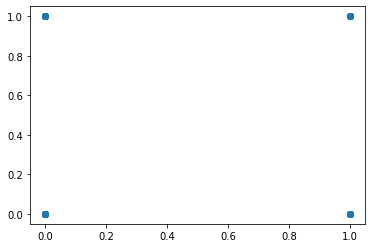

In [103]:
# plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [104]:
## Residuals
residuals=y_test-reg_pred

In [105]:
residuals

42758    0
43367    0
16       0
12557    0
57010    0
        ..
55334    0
33745    0
46153    0
7572     0
10888    0
Name: LoanStatus, Length: 17198, dtype: int64

In [106]:
# CreditGrade
# CurrentDelinquencies
# DebtToIncomeRatio
# ProsperScore
# EmploymentStatus
# OpenCreditLines

In [107]:
x

,Term,CreditGrade,BorrowerAPR,BorrowerRate,BorrowerState,CurrentDelinquencies,DebtToIncomeRatio,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,OpenRevolvingMonthlyPayment,TotalInquiries,RevolvingCreditBalance,LoanOriginationDate,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,InvestmentFromFriendsCount,Investors
0,36,3,0.16516,0.1580,5,5.875166,0.17,0.168661,0.080306,0.096068,...,24,3.0,0.000000,1711,9425.00,1971.1400,0.00,0.0,0,258
1,36,6,0.28269,0.2750,10,5.875166,0.06,0.168661,0.080306,0.096068,...,0,1.0,17598.706751,34,3001.00,1185.6300,0.00,0.0,0,41
2,36,3,0.15033,0.1325,4,5.875166,0.27,0.168661,0.080306,0.096068,...,40,5.0,1220.000000,197,1000.00,11.6500,0.00,0.0,0,53
3,36,3,0.17969,0.1435,1,5.875166,0.18,0.126400,0.052400,0.074000,...,290,4.0,8624.000000,138,88.64,47.1774,0.00,0.0,0,1
4,36,3,0.35797,0.3177,9,5.875166,0.49,0.289600,0.165000,0.124600,...,300,1.0,9103.000000,961,209.75,311.3800,3790.25,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57319,36,1,0.07469,0.0679,47,5.875166,0.06,0.168661,0.080306,0.096068,...,763,9.0,89961.000000,1207,4291.99,464.9300,0.00,0.0,0,194
57320,36,3,0.22362,0.1899,5,5.875166,0.27,0.175700,0.061000,0.114700,...,7,2.0,4.000000,1218,2000.00,83.6200,0.00,0.0,0,25
57321,36,3,0.30285,0.2639,9,5.875166,0.05,0.231800,0.122500,0.109300,...,135,19.0,1109.000000,1368,2500.00,172.5800,0.00,0.0,0,26
57322,36,3,0.13220,0.1110,38,5.875166,0.11,0.100700,0.020000,0.080700,...,495,4.0,15743.000000,441,1997.16,333.3900,0.00,0.0,0,22


In [108]:
model.predict([[36,3,0.16,0.15,5,5.87,0.17,0.16,0.08,0.09,4.07,3,5.95,1,640,659,4,12,1,24,3,0,1711,9425,1971.14,0,0,0,258]])

array([0], dtype=int64)

In [109]:
model.predict([[36,3,0.28,0.24,14,5.87,0.39,0.21,0.10,0.10,3,4,5.87,0,680,699,7,34,5,2445,0,7975,1002,117.73,118.28,1882.27,0,0,30]])

array([1], dtype=int64)